# Agenda

1. Background on polotting in Python/Pandas
2. Plotting with a series
    - line plot
    - bar plot
    - histogram
    - pie plot
    - boxplot
3. Plotting with a data frame
    - line
    - bar
    - histogram
    - pie plot
    - boxplot
4. Scatterplot
5. Tricks with plots
6. Seaborn

# Background on plotting

Matplotlib is powerful but hard. We can use Pandas to plot with it.

In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
s = Series([10, 20, 30, 40, 50, 30, 20, 50, 60])
s

0    10
1    20
2    30
3    40
4    50
5    30
6    20
7    50
8    60
dtype: int64

<Axes: >

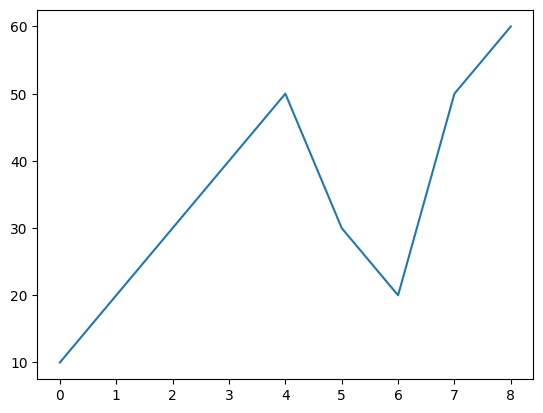

In [4]:
s.plot()

In [5]:
s = Series([10, 20, 30, 40, 50, 30, 20, 50, 60],
           index=list('abcdefghi'))
s

a    10
b    20
c    30
d    40
e    50
f    30
g    20
h    50
i    60
dtype: int64

<Axes: >

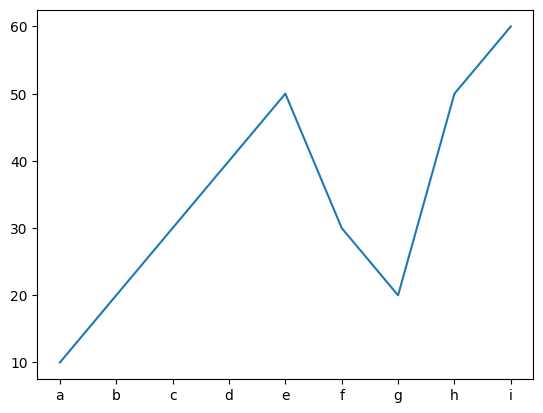

In [6]:
s.plot()

<Axes: >

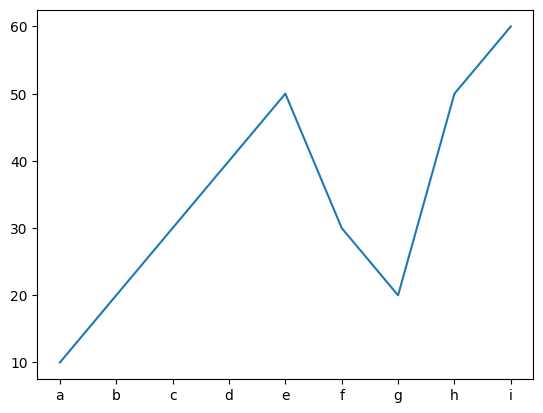

In [7]:
# the default is a line plot!
# two better ways to do this

s.plot(kind='line')

<Axes: >

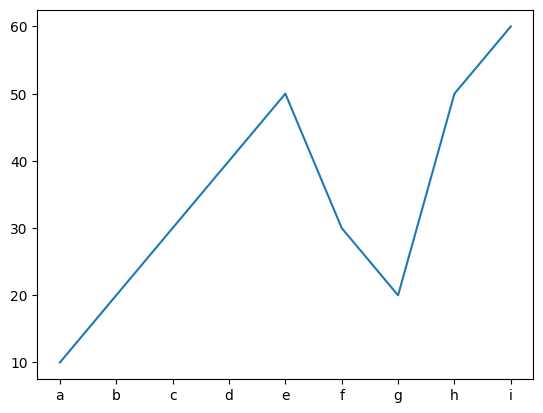

In [8]:
# we can also use plot as a name, and invoke a method on it
s.plot.line()

In [9]:
type(s.plot)

pandas.plotting._core.PlotAccessor

<Axes: >

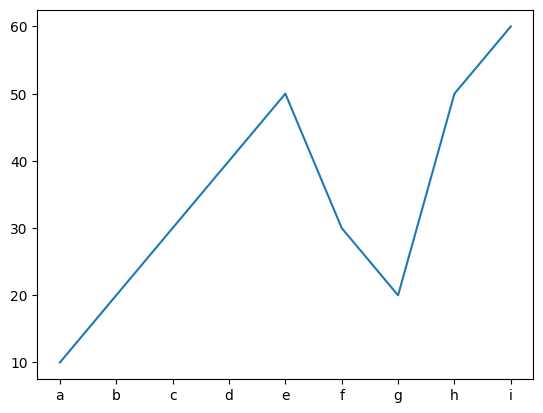

In [10]:
s.plot.__call__()

matplotlib.axes._axes.Axes

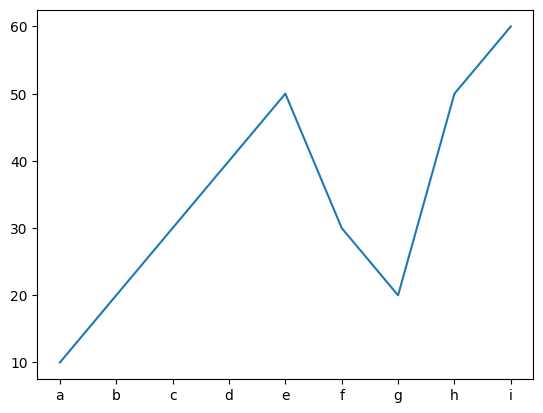

In [11]:
type(s.plot())

In [12]:
help(s.plot.line)

Help on method line in module pandas.plotting._core:

line(x: 'Hashable | None' = None, y: 'Hashable | None' = None, **kwargs) -> 'PlotAccessor' method of pandas.plotting._core.PlotAccessor instance
    Plot Series or DataFrame as lines.

    This function is useful to plot lines using DataFrame's values
    as coordinates.

            Parameters
            ----------
            x : label or position, optional
                Allows plotting of one column versus another. If not specified,
                the index of the DataFrame is used.
            y : label or position, optional
                Allows plotting of one column versus another. If not specified,
                all numerical columns are used.
            color : str, array-like, or dict, optional
                The color for each of the DataFrame's columns. Possible values are:

                - A single color string referred to by name, RGB or RGBA code,
                    for instance 'red' or '#a98d19'.

      

In [13]:
help(DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |
 |  Make plots of Series or DataFrame.
 |
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' :

<Axes: title={'center': 'My great plot'}>

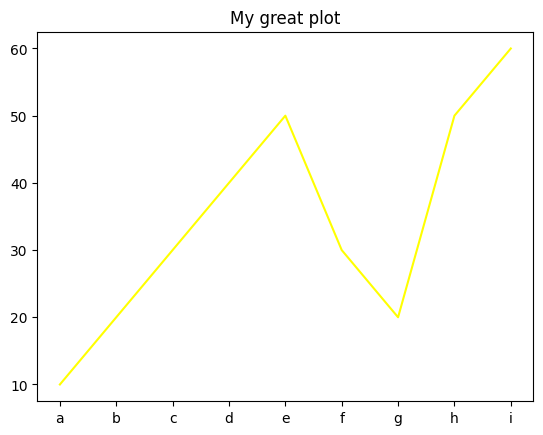

In [16]:
s.plot.line(title='My great plot',
           color='yellow')

In [ ]:
s.plot.line(title='My great plot',
           color='')